# Regressão Linear

A regressão linear compreende a classe de problemas em que as entradas e saídas possuem uma relação linear, conforme ilustrado pela figura abaixo.

<img src="imgs/linear_model.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Exemplo de relação linear entre x e y.
</div>

<br>

Nestes casos o modelo do sistema pode ser expresso como uma combinação linear dos parâmetros $\theta_{0}$ e $\theta_{1}$:

$$h_{\theta}(x) = \theta_{0} + \theta_{1} x_{1}$$

## Notação Matricial

A implementação dos algoritmos de aprendizagem de máquina através da notação matricial resulta em elevado ganho de performance. Afinal as linguagens de programação de alto nível como octave, matlab e python possuem algoritmos especializados para operação matricial transformando esta notação muito superior a representação do problema através de laços de repetição.

Uma forma de viabilizar esta notação é adicionar a entrada $x_{0} = 1$ ao vetor de entradas. Esta medida cria em $x$ um correspondente para o termo $\theta_0$.

$$x = \begin{bmatrix} x_{1} \\ x_{2} \\ ... \\ x_{n} \end{bmatrix} \rightarrow x = \begin{bmatrix} 1 \\ x_{1} \\ x_{2} \\ ... \\ x_{n} \end{bmatrix} = \begin{bmatrix} x_{0} \\ x_{1} \\ x_{2} \\ ... \\ x_{n}\end{bmatrix}$$

Outra vantagem da notação matricial é a possibilidade de paralelização dos cálculos, principalmente das operações de multiplicação. Abaixo segue um exemplo desta notação com somente uma entrada ($n = 1$), porém com quatro amostras (m=4).

$$\small x = \begin{bmatrix} x_{1} \end{bmatrix} = \begin{bmatrix} 2104 & 1416 & 1534 & 852\end{bmatrix}$$

$$ \small \theta = \begin{bmatrix} \theta_{0} \\ \theta_{1}\end{bmatrix} = \begin{bmatrix} -40 \\ 0.25\end{bmatrix}$$

Adicionando $x_{0}$ ao vetor de entradas:

$$\small x = \begin{bmatrix} 1 & 1 & 1 & 1\\ 2104 & 1416 & 1534 & 852\end{bmatrix}$$

Podemos finalmente escrever o modelo em sua forma matricial:

$$h_\theta(x) = x^T \theta$$

$$ \small h(x) = \begin{bmatrix} 1 & 2104 \\ 1 & 1416 \\ 1 & 1534 \\ 1 & 852 \end{bmatrix} . \begin{bmatrix} -40 \\ 0.25\end{bmatrix} = \begin{bmatrix} 486\\ 314\\ 344\\ 173\end{bmatrix}$$

Cada coluna da matriz $h(x)$ resultante indica as estimativas para cada conjunto de hipótese $(\theta_{0}^{k}, \theta_{1}^{k})$, já as linhas da matriz refletem as estimativas para cada entrada $x^{i}$. Os scripts abaixo implementam o modelo linear apresentado.

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def add_ones_column(x):
    """
    Append ones on first column ([a b c] -> [1 a b c])
    Arguments:
        x: np.array (mxn)
    Returns:
        np.array (mxn+1)
    """
    [m, n] = np.shape(x)
    new_x = np.zeros([m, n+1])
    new_x[:,0] = np.ones(m)
    new_x[:,1:] = x[:, 0:]

    return new_x

def h(x, o):
    """
    Linear regression model (o0*x0 + o1*x1)
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
    Returns:
        np.array (mxk)
    """
    x = add_ones_column(x)
    return np.dot(x, o)

## Treinamento

O processo de treinamento consiste em obter um modelo que minimize a diferença entre as estimativas $h_{\theta}(x^{i})$ e as saídas conhecidas $y^{i}$ para todos os conjuntos de treinamento. A quantificação dessa diferença, também denominada de **função custo J**, pode ser obtida através de uma série de algoritmos, porém o Erro Quadrático Médio (MSE) e o Erro Médio Absoluto (MAE) figuram entre os mais utilizados.

$$MSE = \frac{1}{m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})^{2}$$
$$MAE = \frac{1}{m} \sum\limits_{i=1}^{m}|h_{\theta}(x^{i}) - y^{i}|$$

A função custo determina o quão preciso é o modelo para uma determinada configuração de parâmetros, sendo assim, somente recebe como parâmetro vetores $\theta$ com $k = 1$. Posto isto, podemos reescrever a função MSE em notação matricial. 

$$e = h_{\theta}(x^{i}) - y^{i}$$
$$MSE = \frac{1}{m} e^{T} e$$

As funções abaixo implementam os dois algoritmos.

In [119]:
def MSE(x, o, y):
    """
    Mean squared error
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        double (mse)
    """
    m = np.shape(x)[0]
    h_x = h(x, o)
    e = h_x - y
    return np.dot(np.transpose(e), e)*1/m

def MAE(x, o, y):
    """
    Mean absolute error
    Arguments:
        x: np.array (mxn) 
        o: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        double (mae)
    """
    m = np.shape(x)[0]
    h_x = h(x, o)
    return np.sum(np.abs(h_x - y), axis=0)*1/m

A função abaixo determina dentre os parâmetros $\theta$ qual o que produz o menor custo quando aplicado ao modelo.

In [105]:
def minimize_j(J, x, o, y):
    """
    Discover which one o minimize j
    Arguments:
        J: cost function
        x: np.array (mxn)
        o: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        o_min: np.array (n+1x1) (o minimized)
    """
    j_min = np.inf
    o_min = []
    k = np.shape(o)[1]
    for i in range(k):
        o_k = np.vstack(o[:, i])
        j = J(x, o_k, y)

        if j < j_min:
            j_min = j
            o_min = o_k
            
    return o_min

A função a seguir determina para cada função custo qual o conjunto de parâmetros que resulta no menor erro de estimativa além de comparar os modelos estimados com os dados de treinamento. 

In [106]:
def compare_mse_and_mae(x, o, y):
    """
    Compares MSE and MAE ploting your curves minimized
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        
    """
    o_min_mse = minimize_j(MSE, x, o ,y)
    h_mse = h(x, o_min_mse)
    
    o_min_mae = minimize_j(MAE, x, o ,y)
    h_mae = h(x, o_min_mae)

    plt.figure(figsize=(20,8))

    plt.plot(x, y, '*')
    plt.plot(x, h_mse)
    plt.plot(x, h_mae)
    
    h_mse_legend = 'h_mse = ' + str(np.round(o_min_mse[0],2)) + ' + ' + str(np.round(o_min_mse[1],2)) + '*x'
    h_mae_legend = 'h_mae = ' + str(np.round(o_min_mae[0],2)) + ' + ' + str(np.round(o_min_mae[1],2)) + '*x'

    plt.legend(['y', h_mse_legend, h_mae_legend])

O script abaixo define um conjunto de treinamento para a função $y$.

In [108]:
x = np.mgrid[-10:10:1].reshape(1,-1).T # mx1
y = 1 + 2*x

Posteriormente é gerado de forma randômica $k$ conjuntos de parâmetros para o modelo. 

In [109]:
k = 10000
o = np.random.normal(size = [2, k]) # 2xk

A figura abaixo compara os resultados dos modelos obtidos com cada função custo.

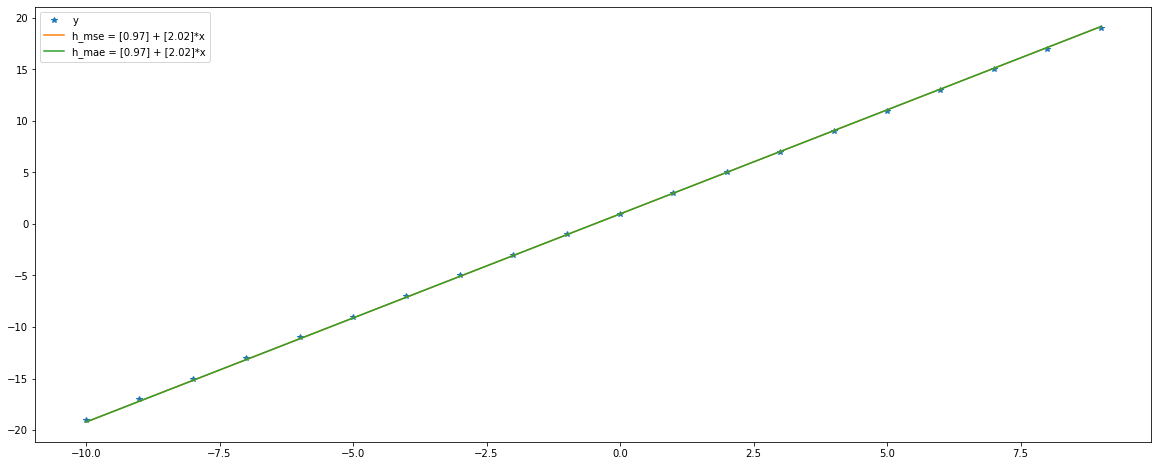

In [110]:
compare_mse_and_mae(x, o, y)

Pela inspeção dos resultados obtidos é possível verificar que a minimização das funções custo produziu uma boa estimativa do modelo do sistema, além de ambas as funções terem resultado no mesmo conjunto de parâmetros. 

A seguir, com o objetivo de avaliar a robustez do algoritmo de aprendizado proposto, o script abaixo introduz um outlier arbitrário no conjunto de dados de treinamento.

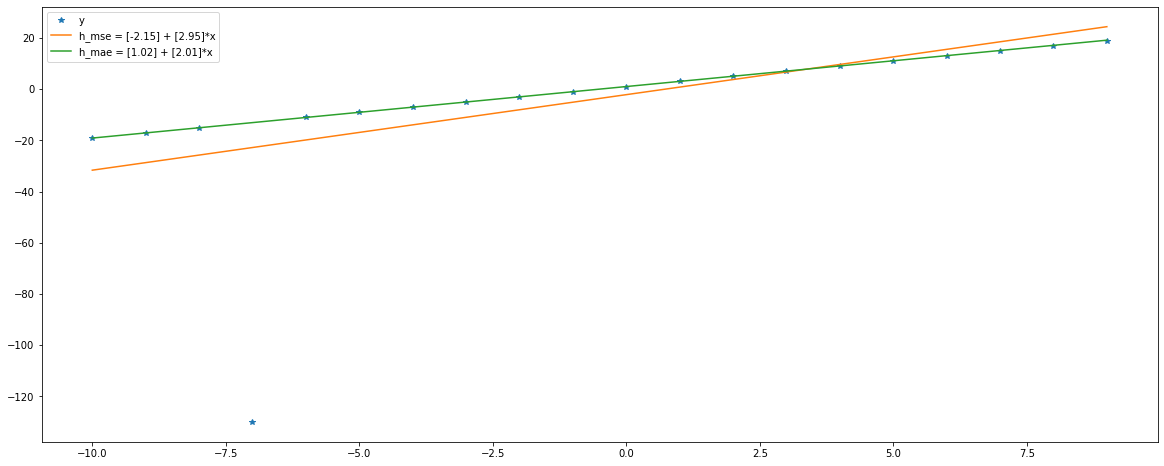

In [104]:
# introduce outlier
y[3] *= 10

compare_mse_and_mae(x, o, y)

Neste exemplo é possível verificar que o MSE divergiu bastante com relação a determinação dos parâmetros do modelo. Isto se deve a uma maior penalização para os pontos distantes da curva quando empregado o MSE, afinal neste caso o erro da estimativa é elevado ao quadrado. Sendo assim, para minimizar o erro do modelo, os parâmetros obtidos com o MSE tendem a propor uma reta que se aproxima dos outliers. 

Em aplicações reais é comum a utilização de uma etapa de pré-processamento dos dados de treinamento para remoção dos outliers. Ademais, o MSE é largamente adotado para avaliação dos algoritmos de aprendizado de máquina visto que permite verificar o comportamento do modelo com relação a presença de outliers.

## Visualização do Custo

Uma forma de verificar o comportamento da função custo em função da variação dos parâmetros do modelo é através da análise gráfica. A seguir são apresentados os dois métodos mais empregados no contexto dos problemas de regressão linear. 

### Superfície
As funções custo para a regressão linear são funções quadráticas bivariadas, ou seja, possuem duas variáveis de entrada e uma de saída. A representação gráfica de funções bivariadas pode ser obtida com uma superfície em um plano tridimensional. A figura abaixo ilustra a superfície que representa o retorno da função MAE para um conjunto de parâmetros arbitrário.

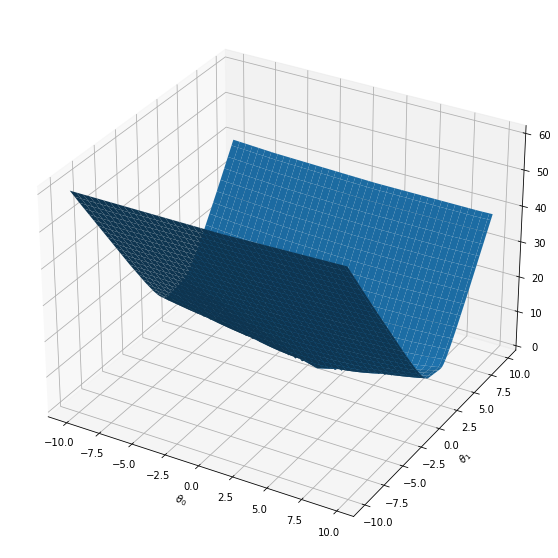

In [116]:
# arbitrary parameters
o0 = np.arange(-10, 10, 0.25)
o1 = np.arange(-10, 10, 0.25)

# prepare data in meshgrid format
X, Y = np.meshgrid(o0, o1)

# serialize meshgrid to use MAE
c_o = np.power(len(o0), 2)
o = np.zeros((2, c_o))
o[0, :] = np.reshape(X, [1, c_o]) 
o[1, :] = np.reshape(Y, [1, c_o])
mae = MAE(x, o, y)

# transform mae to meshgrid
Z = np.reshape(mae, np.shape(X))

# plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel(r'$\theta_{0}$')
ax.set_ylabel(r'$\theta_{1}$')
ax.plot_surface(X, Y, Z)

Verifica-se que por ser uma função modular a superfície resultante possui um formato em ‘V’, cujo mínimo é obtido para os parâmetros $(1, 2)$.

### Curvas de Nível

As curvas de nível fornecem uma excelente alternativa para a visualização de funções quadráticas bivariadas, nestas representações todas as informações são condensadas em um plano de duas dimensões. O Script abaixo mostra as curvas de nível da função MAE para um conjunto de parâmetros arbitrário.

Text(0, 0.5, '$\\theta_{1}$')

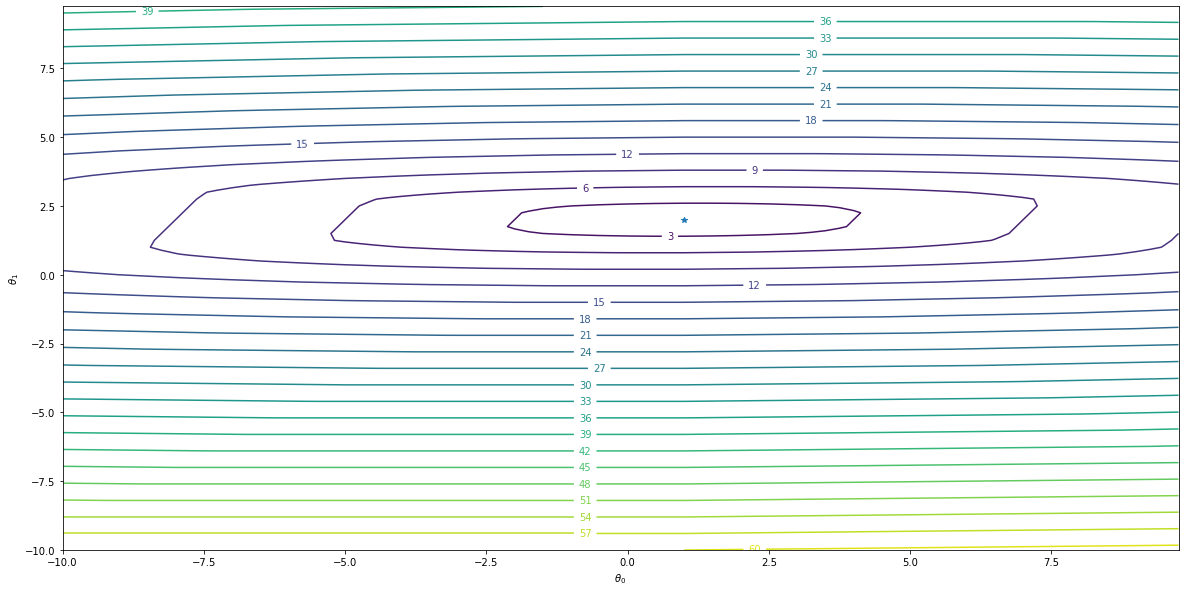

In [118]:
# plot countour lines
fig = plt.figure(figsize=(20,10))
contours = plt.contour(X, Y, Z, 20)
plt.plot(1,2, '*') # center point -> minimum cost
plt.clabel(contours, inline = True, fontsize = 10)
plt.xlabel(r'$\theta_{0}$')
plt.ylabel(r'$\theta_{1}$')

Nesta representação todos os pontos $(\theta_0^k, \theta_1^k)$ situados sobre a mesma circunferência possuem o mesmo custo, ou seja retornam o mesmo valor quando aplicados a função MAE. À medida em que os pontos se aproximam do centro da figura o custo é diminuído de tal forma que o custo mínimo é dado pelo ponto central da menor circunferência de coordenadas $(1,2)$.


## Considerações Finais

A estratégia randômica, baseada em tentativa e erro, utilizada neste capítulo para a determinação dos parâmetros do modelo possui um alto custo computacional, afinal foram necessários $n_{o} = 10.000$ conjuntos de parâmetros para que a convergência fosse garantida.

O capítulo a seguir apresenta uma alternativa mais eficiente. Os algoritmos **otimizadores**, dentre eles o seu maior expoente **Gradiente Descendente**, são largamente adotados na etapa de treinamento para determinação dos parâmetros $\theta$ que minimizam o custo do modelo.

Enfim, os algoritmos desenvolvidos neste capítulo podem ser obtidos em [src/linear_regression.py](src/linear_regression.py).